In [169]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from IPython.core.interactiveshell import InteractiveShell
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVC
# import mlflow
from mlflow.models import infer_signature
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC


In [170]:
import csv
import sqlite3

# Load data from CSV
with open('Housing.csv', 'r') as file:
    reader = csv.reader(file)
    header = next(reader)  # Assuming the first row contains column names
    print(header)
    data = [row for row in reader]

# Create SQLite database and table
conn = sqlite3.connect('house_prices5.db')
cursor = conn.cursor()

# Create table
create_table_query = """
CREATE TABLE IF NOT EXISTS houses (
    price INT,
    area INT,
    bedrooms INT,
    bathrooms INT,
    stories INT,
    mainroad VARCHAR(3),
    guestroom VARCHAR(3),
    basement VARCHAR(3),
    hotwaterheating VARCHAR(3),
    airconditioning VARCHAR(3),
    parking INT,
    prefarea VARCHAR(3),
    furnishingstatus VARCHAR(20)
);
"""
cursor.execute(create_table_query)
# Insert data into the table
insert_query = "INSERT INTO houses VALUES ({})".format(','.join(['?']*len(header)))
cursor.executemany(insert_query, data)

# Commit changes and close connection
conn.commit()
conn.close()

print("Database setup complete.")

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
Database setup complete.


In [192]:
import pandas as pd
import sqlite3

# Connect to the database
conn = sqlite3.connect('house_prices5.db')

# Write SQL query with joins to fetch data
query = "SELECT * FROM houses"
df = pd.read_sql_query(query, conn)
# Close connection
conn.close()

# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title="Profiling Report")
# profile

# Perform train/test split
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['price'])
y = df['price']

# Perform stratified train/test split with 80% training data and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['mainroad'])

## Check stratification
X_train['mainroad'].value_counts() / len(X_train['mainroad'])
X_test['mainroad'].value_counts() / len(X_test['mainroad'])

# Check for null and missing values
print("Null and Missing Values:")
print(X_train.isnull().sum())
print(X_train)

Null and Missing Values:
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
      area  bedrooms  bathrooms  stories mainroad guestroom basement  \
905   4040         2          1        1      yes        no       no   
717   8400         3          1        2      yes       yes      yes   
176   8520         3          1        1      yes        no       no   
1989  8400         2          1        1      yes        no       no   
9     5750         3          2        4      yes       yes       no   
...    ...       ...        ...      ...      ...       ...      ...   
1700  8880         3          2        2      yes        no      yes   
907   4050         2          1        1      yes        no       no   
984   3930         2          1        1       no 

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4     

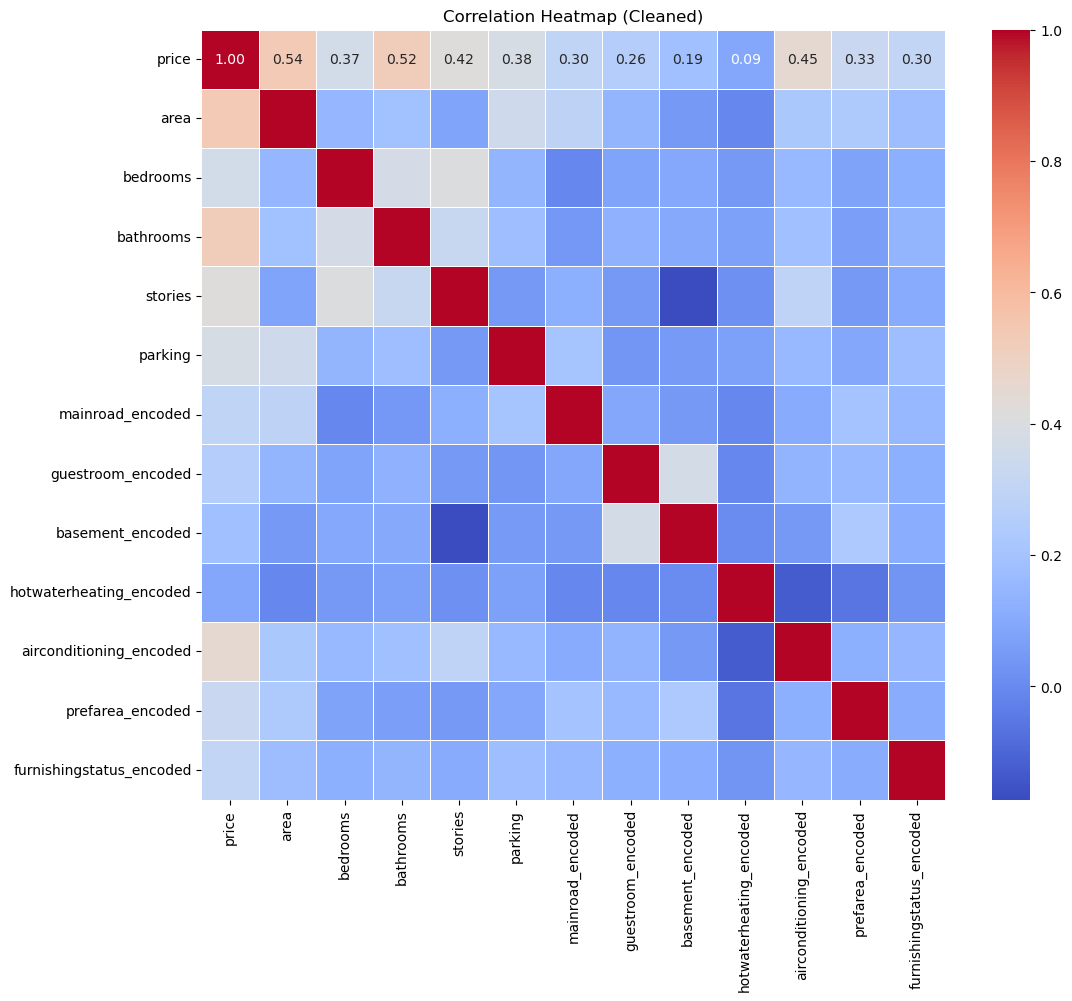

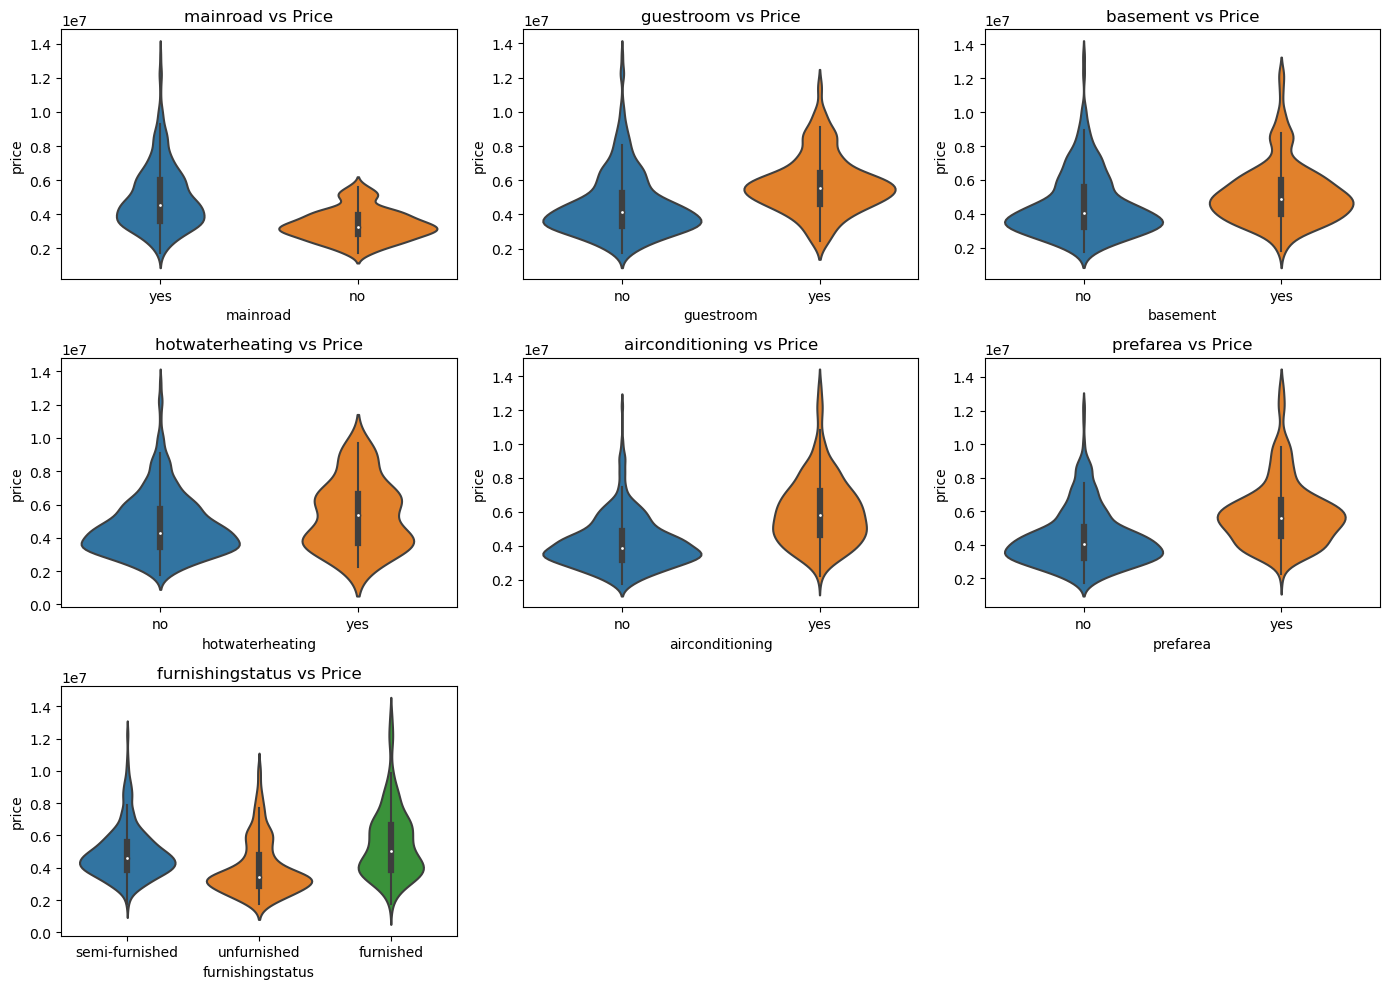

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

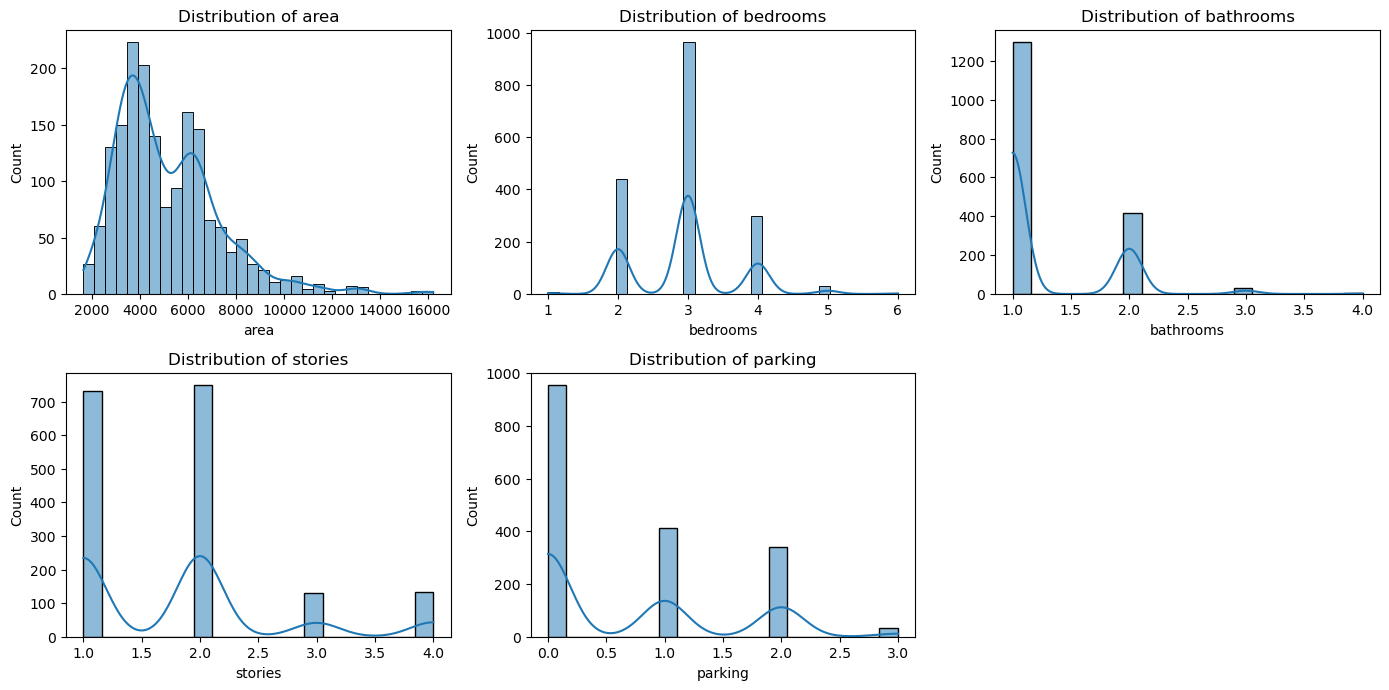

In [193]:
# Exploratory Data Analysis (EDA)

# Categorize data into categorical and numerical value
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_features = X_train.select_dtypes(include=['int', 'float']).columns.tolist()
print(categorical_features)
print(numerical_features)
print(df.head(5))
categorical_features_2d = np.array(categorical_features, dtype= object).reshape(-1, 1)
print("**************************")
# categorical_features = categorical_features.select_dtypes(include=['object']).columns.tolist()
# print(categorical_features_2d.dtype)
# print(categorical_features.dtype)


# array = np.array()


# Plots

df['mainroad_encoded'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom_encoded'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement_encoded'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating_encoded'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning_encoded'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea_encoded'] = df['prefarea'].map({'yes': 1, 'no': 0})
df['furnishingstatus_encoded'] = df['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})
# Compute correlation matrix
columns_to_drop = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
df.drop(columns=columns_to_drop, inplace=True)
print(df.head())
corr_matrix_encoded = df.corr()
# Plot heatmap
df_cleaned = df.dropna(axis=1)
# Compute correlation matrix
corr_matrix_cleaned = df_cleaned.corr()
# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_cleaned, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Cleaned)')
plt.show()

# Violin plots to demonstrate correlation between the target value and categorical features
plt.figure(figsize=(14, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i+1)
    sns.violinplot(x=feature, y=y_train, data=pd.concat([X_train[feature], y_train], axis=1))
    plt.title(f'{feature} vs Price')
plt.tight_layout()
plt.show()

# Insights from analysis of categorical and numerical correlation heatmaps
# - From the correlation heatmap, we can observe the correlation between numerical features.
# - Some categorical features like 'mainroad', 'guestroom', 'basement', etc., seem to have some impact on the target 'price'.

# Distribution of each attribute/feature
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(X_train[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [175]:


# Develop a class-based preprocessor


class Preprocessor(BaseEstimator, TransformerMixin): 
    # Train our custom preprocessors 
    numerical_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
    categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
    
    def fit(self, X, y=None): 

        # Create and fit simple imputer
        self.imputer = SimpleImputer(strategy='median')
        self.imputer.fit(X[self.numerical_columns])
        
        # Create and fit Standard Scaler 
        self.scaler = StandardScaler()
        self.scaler.fit(X[self.numerical_columns]) 
        
        # Create and fit one hot encoder
        self.onehot = OneHotEncoder(handle_unknown='ignore')
        self.onehot.fit(X[self.categorical_columns])
        
        return self 

    def transform(self, X): 
        
        # Apply simple imputer 
        imputed_cols = self.imputer.transform(X[self.numerical_columns])
        onehot_cols = self.onehot.transform(X[self.categorical_columns])
        
        # Copy the df 
        transformed_df = X.copy()
         
        # Apply transformed columns
        transformed_df[self.numerical_columns] = imputed_cols
        transformed_df[self.numerical_columns] = self.scaler.transform(transformed_df[self.numerical_columns])        
        
        # Drop existing categorical columns and replace with one hot equivalent
        transformed_df = transformed_df.drop(self.categorical_columns, axis=1) 
        transformed_df[self.onehot.get_feature_names_out()] = onehot_cols.toarray().astype(int)
        
        return transformed_df

preprocessor = Preprocessor()
preprocessor.fit(X_train)
X_train_fixed = preprocessor.transform(X_train)
X_train.info()
X_train_fixed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1744 entries, 905 to 469
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              1744 non-null   int64 
 1   bedrooms          1744 non-null   int64 
 2   bathrooms         1744 non-null   int64 
 3   stories           1744 non-null   int64 
 4   mainroad          1744 non-null   object
 5   guestroom         1744 non-null   object
 6   basement          1744 non-null   object
 7   hotwaterheating   1744 non-null   object
 8   airconditioning   1744 non-null   object
 9   parking           1744 non-null   int64 
 10  prefarea          1744 non-null   object
 11  furnishingstatus  1744 non-null   object
dtypes: int64(5), object(7)
memory usage: 177.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 1744 entries, 905 to 469
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                         

In [204]:
models = {
    'Linear Regression': LinearRegression(n_jobs=10),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting':GradientBoostingRegressor(),
    'Ridge Regression': Ridge(),
    "SVC":SVC()
}
for model in models.items():
    print(model[0])

Linear Regression
Random Forest
Gradient Boosting
Ridge Regression
SVC


In [205]:
print(df.head(5))
x=df.drop("price",axis=1)
y=df["price"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
a=1
best_r2=-1

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),  
        ('model', model)
    ])
    
    # Fit the pipeline
    model=pipe.fit(X_train_fixed, y_train)
    y_pre=model.predict(X_train_fixed)
    
    print(f'{a} :- {name} - MSE: {mean_squared_error(y_train, y_pre):.4f}')
    print(f'     {name} - R2: {r2_score(y_train, y_pre):.4f}')
    print(f'     {name} - MAE: {mean_absolute_error(y_train, y_pre):.4f}',"\n")
    a+=1
    r2=r2_score(y_train, y_pre)        
    if r2 > best_r2:
        best_r2 = r2
        best_model_name = name
        best_model = model

print(f'The best model is: {best_model_name}')
print(f'The best model R2 Score is: {best_r2}')

      price  area  bedrooms  bathrooms  stories  parking  mainroad_encoded  \
0  13300000  7420         4          2        3        2                 1   
1  12250000  8960         4          4        4        3                 1   
2  12250000  9960         3          2        2        2                 1   
3  12215000  7500         4          2        2        3                 1   
4  11410000  7420         4          1        2        2                 1   

   guestroom_encoded  basement_encoded  hotwaterheating_encoded  \
0                  0                 0                        0   
1                  0                 0                        0   
2                  0                 1                        0   
3                  0                 1                        0   
4                  1                 1                        0   

   airconditioning_encoded  prefarea_encoded  furnishingstatus_encoded  
0                        1                 1           

In [179]:

# print(data_to_predict.dtype)
print(df.head)
if best_model is not None:
    prediction = best_model.predict(X_train_fixed.head(1))
    print("Best Model:", best_model_name)
    print("Predicted Price:", prediction)
else:
    print("No best model found. Something went wrong.")

<bound method NDFrame.head of          price  area  bedrooms  bathrooms  stories  parking  mainroad_encoded  \
0     13300000  7420         4          2        3        2                 1   
1     12250000  8960         4          4        4        3                 1   
2     12250000  9960         3          2        2        2                 1   
3     12215000  7500         4          2        2        3                 1   
4     11410000  7420         4          1        2        2                 1   
...        ...   ...       ...        ...      ...      ...               ...   
2175   1820000  3000         2          1        1        2                 1   
2176   1767150  2400         3          1        1        0                 0   
2177   1750000  3620         2          1        1        0                 1   
2178   1750000  2910         3          1        1        0                 0   
2179   1750000  3850         3          1        2        0                 1  

In [199]:
!pip install -q dagshub mlflow

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.7.0 requires botocore<1.31.65,>=1.31.16, but you have botocore 1.34.106 which is incompatible.


In [202]:
import dagshub
dagshub.init(repo_owner='anantharamrakeshnandan', repo_name='python-project-40', mlflow=True)
mlflow.set_tracking_uri('https://dagshub.com/anantharamrakeshnandan/Python-project-40.mlflow')

Initialized MLflow to track repo "anantharamrakeshnandan/python-project-40"

Repository anantharamrakeshnandan/python-project-40 initialized!

In [203]:
import mlflow
from mlflow.models import infer_signature
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC

# Set our tracking server uri for logging
# mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")

# Create a new MLflow Experiment
mlflow.set_experiment("House price prediction and selecting best model")

# Define models
models = {
    'Random_Forest': RandomForestRegressor(),
    'Gradient_Boosting': GradientBoostingRegressor(),
    'Ridge_Regression': Ridge()
}

# Loop over models
for model_name, model in models.items():
    # Start an MLflow run
    with mlflow.start_run(run_name=model_name):
        # Fit the model
        model.fit(X_train_fixed, y_train)
        
        # Make predictions
        y_pred = model.predict(X_train_fixed)

        # Calculate evaluation metrics
        rmse = mean_squared_error(y_train, y_pred, squared=False)
        mae = mean_absolute_error(y_train, y_pred)

        # Log the hyperparameters
        mlflow.log_params(model.get_params())

        # Log metrics
        mlflow.log_metric("root_mean_squared_error", rmse)
        mlflow.log_metric("mean_absolute_error", mae)

        # Set a tag to indicate the model type
        mlflow.set_tag("Model Type", model_name)

        # Infer the model signature
        signature = infer_signature(X_train_fixed, model.predict(X_train_fixed))

        # Log the model
        model_info = mlflow.sklearn.log_model(
            sk_model=model,
            artifact_path=model_name,
            signature=signature,
            input_example=preprocessor.transform(X_train),
            registered_model_name=f"{model_name}_model",
        )


2024/05/16 09:32:31 INFO mlflow.tracking.fluent: Experiment with name 'House price prediction and selecting best model' does not exist. Creating a new experiment.
/opt/anaconda3/lib/python3.11/site-packages/mlflow/types/utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Successfully registered model 'Random_Forest_model'.
2024/05/16 09:33:34 INFO mlf

In [212]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
with mlflow.start_run(run_name="RandomForestRegressor_Hyperparameter_Tuning"):
    grid_search.fit(X_train_fixed, y_train)
    
    best_rf_tuned = grid_search.best_estimator_
    
    y_pred_train_rf_tuned = best_rf_tuned.predict(X_train_fixed)
    
    mae_rf_tuned = mean_absolute_error(y_train, y_pred_train_rf_tuned)
    mse_rf_tuned = mean_squared_error(y_train, y_pred_train_rf_tuned)
    rmse_rf_tuned = mean_squared_error(y_train, y_pred_train_rf_tuned, squared=False)
    
    mlflow.log_metric("MAE", mae_rf_tuned)
    mlflow.log_metric("MSE", mse_rf_tuned)
    mlflow.log_metric("RMSE", rmse_rf_tuned)
    
    mlflow.sklearn.log_model(best_rf_tuned, "model")